# Google Fonts

In [1]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Gl

['NanumBarunGothic'] 11.0


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

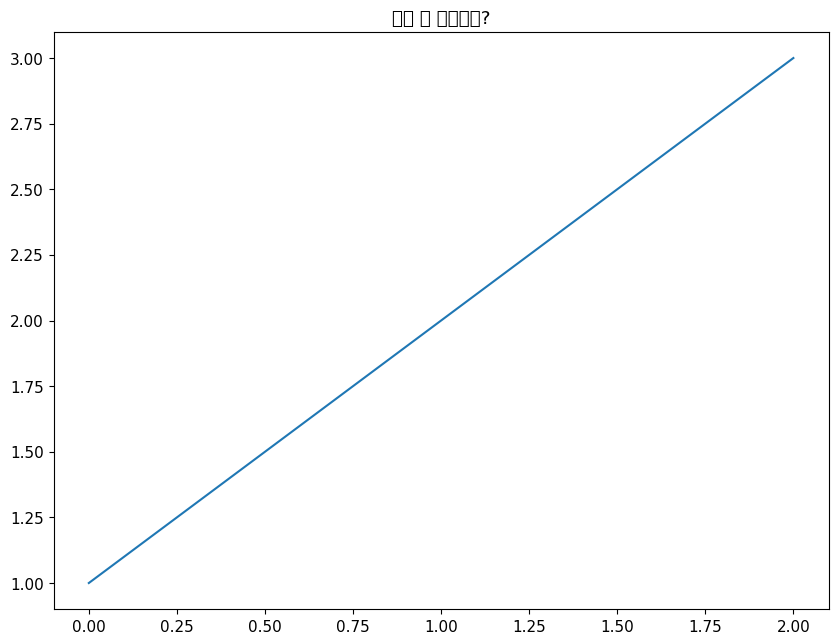

In [2]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

plt.plot([1, 2, 3])
plt.title("한글 잘 나옵니까?")
plt.show()

# Google Drive

In [4]:
#from google.colab import drive
#drive.mount("/content/drive")

In [4]:
# Colab용 notebook입니다. 이 notebook 한 장에서 여러 데이터의 다운로드부터, 추천까지 완결하도록 되어 있습니다(예측 평가는 미포함)
# MovieLens 데이터를 아직 다운로드 하지 않았다면, 이 셀을 실행해서 다운로드합니다.
# MovieLens 데이터 분석은 data_download.ipynb를 참조합니다.

# 데이터 다운로드와 압축 풀기
#!wget -nc --no-check-certificate https://files.grouplens.org/datasets/movielens/ml-10m.zip -P ../data
#!unzip -n ../data/ml-10m.zip -d ../data/

File ‘../data/ml-10m.zip’ already there; not retrieving.

Archive:  ../data/ml-10m.zip


# 어소시에이션 분석(Apriori 알고리즘)

In [5]:
# 부모 폴더의 경로를 추가
# import sys; sys.path.insert(0, '..')
import sys
# Append the directory to your python path using sys
sys.path.append('C:/Users/campus3S031/Desktop/iMBank/iM_DiGital_Banker_academy/recommendation_system/2025_codes')

from util.data_loader import DataLoader
from util.metric_calculator import MetricCalculator

In [6]:
# Movielens 데이터 로딩
data_loader = DataLoader(num_users=1000, num_test_items=5, data_path='../data/ml-10M100K/')
movielens = data_loader.load()

In [7]:
# 사용자 x 영화 행렬 형식으로 변환한다
user_movie_matrix = movielens.train.pivot(index='user_id', columns='movie_id', values='rating')

# 라이브러리를 사용하기 위해 4 이상의 평갓값은 1, 4 미만의 평갓값과 결손값은 0으로 한다
user_movie_matrix[user_movie_matrix < 4] = 0
user_movie_matrix[user_movie_matrix.isnull()] = 0
user_movie_matrix[user_movie_matrix >= 4] = 1

user_movie_matrix.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,62000,62113,62293,62344,62394,62801,62803,63113,63992,64716
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from mlxtend.frequent_patterns import apriori

# 지지도가 높은 영화를 표시
freq_movies = apriori(
    user_movie_matrix, min_support=0.1, use_colnames=True)
freq_movies.sort_values('support', ascending=False).head()

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
42,0.415,(593)
23,0.378,(318)
21,0.368,(296)
19,0.362,(260)
25,0.320,(356)


In [9]:
# movie_id=593의 제목 확인(양들의 침묵)
movielens.item_content[movielens.item_content.movie_id == 593]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,movie_id,title,genre,tag
587,593,"Silence of the Lambs, The (1991)","[Crime, Horror, Thriller]","[based on a book, anthony hopkins, demme, psyc..."


In [10]:
from mlxtend.frequent_patterns import association_rules
# 어소시에이션 규칙 계산(리프트 값이 높은 순으로 표시)
rules = association_rules(freq_movies, num_itemsets = len(freq_movies), metric='lift', min_threshold=1)
rules.sort_values('lift', ascending=False).head()[['antecedents', 'consequents', 'lift']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,lift
659,(4993),(5952),5.459770
658,(5952),(4993),5.459770
1454,"(1196, 1198)","(1291, 260)",4.669188
1455,"(1291, 260)","(1196, 1198)",4.669188
1452,"(1291, 1196)","(260, 1198)",4.171359


In [11]:
# 어소시에이션 추천
from src.association import AssociationRecommender
recommender = AssociationRecommender()
recommend_result = recommender.recommend(movielens)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [12]:
# 평가
metric_calculator = MetricCalculator()
metrics = metric_calculator.calc(
    movielens.test.rating.tolist(), recommend_result.rating.tolist(),
    movielens.test_user2items, recommend_result.user2items, k=10)
print(metrics)

rmse=0.000, Precision@K=0.011, Recall@K=0.035


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# min_support와 정밀도의 관계
for min_support in [0.06, 0.07, 0.08, 0.09, 0.1, 0.11]:
    recommend_result = recommender.recommend(movielens, min_support=min_support)
    metrics = metric_calculator.calc(
    movielens.test.rating.tolist(), recommend_result.rating.tolist(),
    movielens.test_user2items, recommend_result.user2items, k=10)
    print(metrics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


rmse=0.000, Precision@K=0.015, Recall@K=0.048


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


rmse=0.000, Precision@K=0.014, Recall@K=0.042


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


rmse=0.000, Precision@K=0.013, Recall@K=0.042


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


rmse=0.000, Precision@K=0.013, Recall@K=0.039


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


rmse=0.000, Precision@K=0.011, Recall@K=0.035


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


rmse=0.000, Precision@K=0.010, Recall@K=0.034
